In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install sklearn

Looking in indexes: http://pypi.douban.com/simple/
Looking in indexes: http://pypi.douban.com/simple/
Looking in indexes: http://pypi.douban.com/simple/


Class {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data train (60000, 28, 28)
Data test (10000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


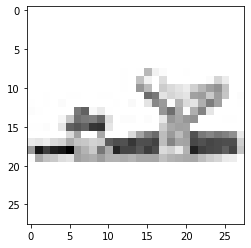

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X,train_y),(test_X,test_y) = tf.keras.datasets.fashion_mnist.load_data()

print("Class", set(train_y))
print("Data train", train_X.shape)          
print("Data test", test_X.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

plt.imshow(train_X[-1], cmap=plt.cm.binary)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

In [3]:
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.4953 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.3676 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.3305 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.3090 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.2931 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 1s 643us/step - loss: 0.2799 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.2639 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.2558 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.2470 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 1s 647u

In [4]:
test_loss, test_acc = model.evaluate(test_X, test_y, verbose=2)
test_acc # akurasi

313/313 - 0s - loss: 0.3393 - accuracy: 0.8805


0.8805000185966492

[[822   0  17  17   0   0 121   0   3   0]
 [  4 973   0  11   0   0   1   0   0   0]
 [ 15   2 843  18 152   0  89   0   2   0]
 [ 34  17  11 901  40   0  39   0   3   0]
 [  4   2  62  28 723   0  43   0   5   0]
 [  2   0   0   1   0 963   0  11   5  14]
 [111   5  67  19  83   0 696   0   1   1]
 [  1   0   0   0   0  25   0 982   7  57]
 [  7   1   0   5   2   1  11   0 974   0]
 [  0   0   0   0   0  11   0   7   0 928]]


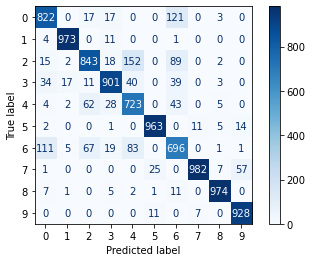

In [5]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def show_confusion_matrix_heat_map(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    return plt.show()

y_pred = model.predict(test_X)
predicted_categories = tf.argmax(y_pred, axis=1)
show_confusion_matrix_heat_map(predicted_categories, test_y, range(10))